In [1]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn

In [44]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data_1=pd.read_csv(r"D:\Datatrained Project\dataset1-master\abalone.csv")
data_1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [15]:
data_1.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
data_1.tail(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [17]:
data_1.shape

(4177, 9)

In [18]:
data_1.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#As the data has no null value so we don't have to use fillna method 

In [19]:
data_1.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


There is not empty data

In [20]:
#finding coorelation
data_1.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


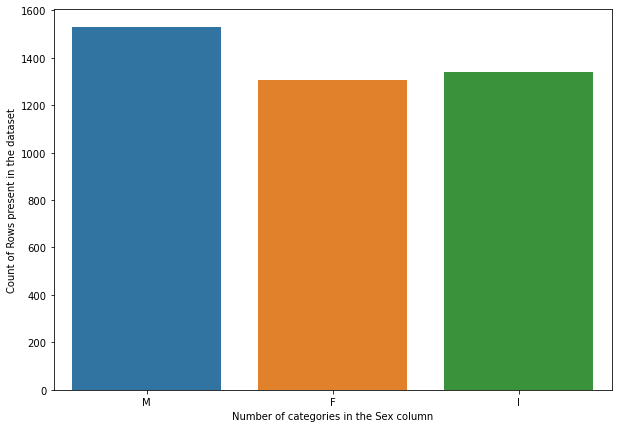

In [34]:
#As we will plot the count plot to see the categories divided

plt.figure(figsize=(10,7))
sns.countplot(x ='Sex', data = data_1)
plt.xlabel('Number of categories in the Sex column')
plt.ylabel('Count of Rows present in the dataset')
plt.show()

In this plot we see that male has more than two options so there is slight imbalance in the data but we are solving with regression so we will move on

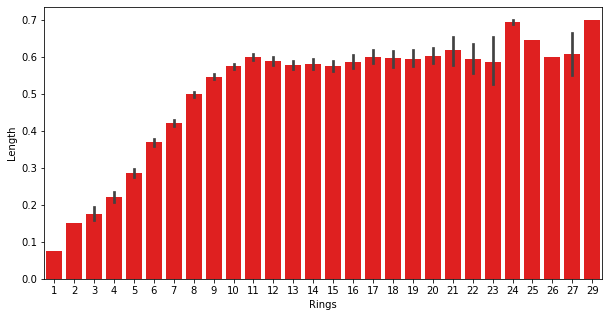

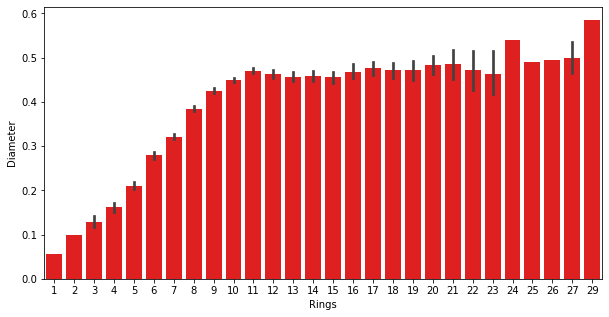

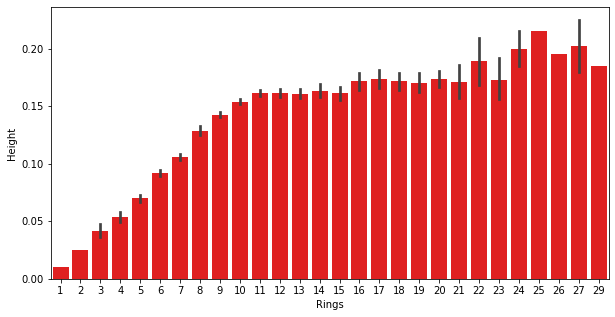

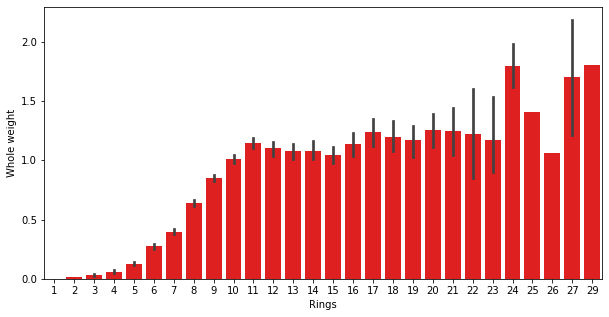

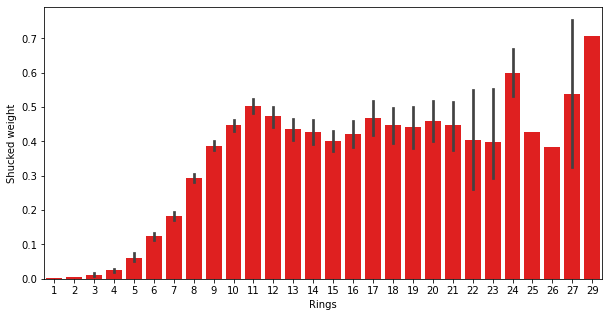

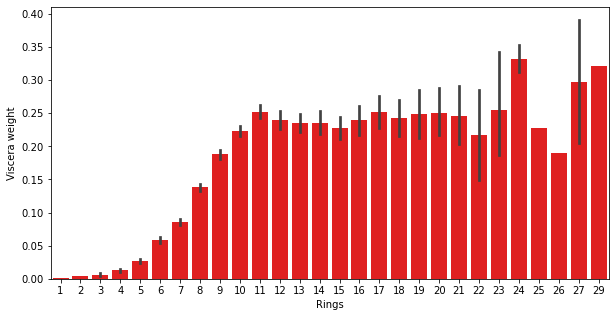

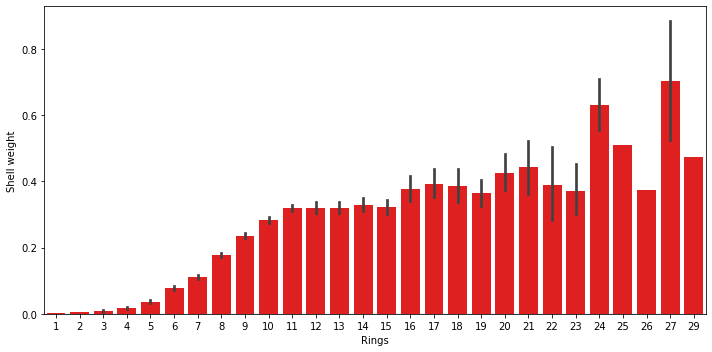

In [39]:
#Let's see with box plot

index=0
labels = data_1['Rings']
features = data_1.drop(['Rings', 'Sex'], axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=data_1, color="Red")
plt.tight_layout()
plt.show()

We can see that the trend is going upward as we move forward but there is an uneven pattern in between the values but we have notice that there is relationship between them

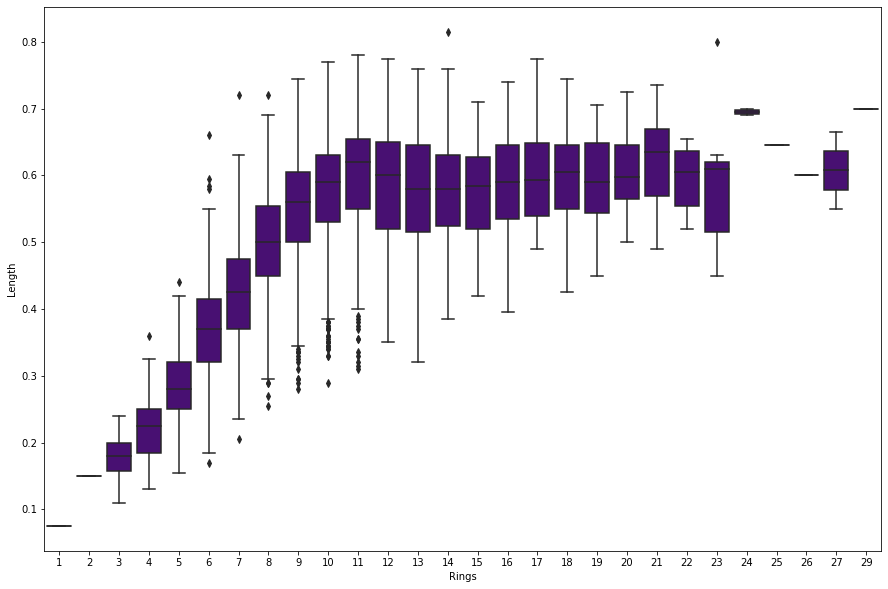

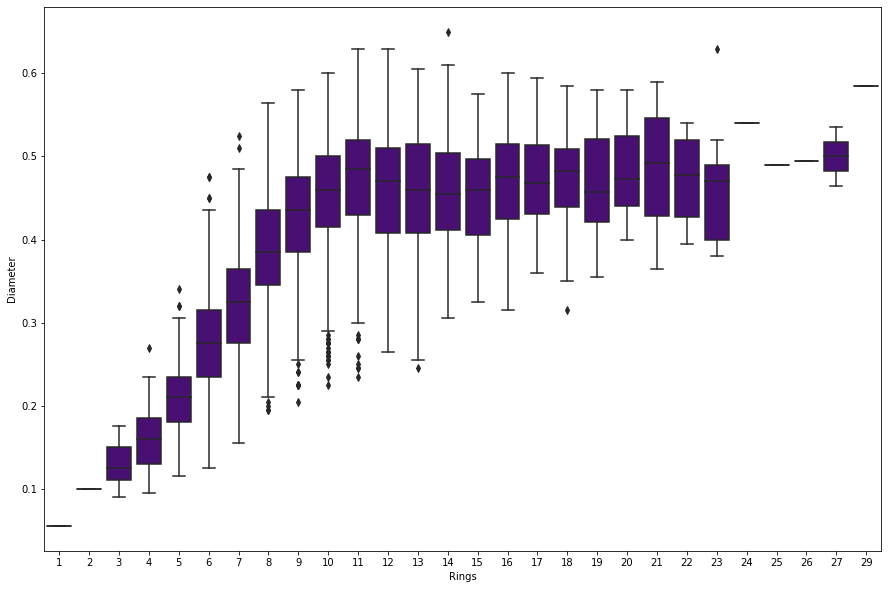

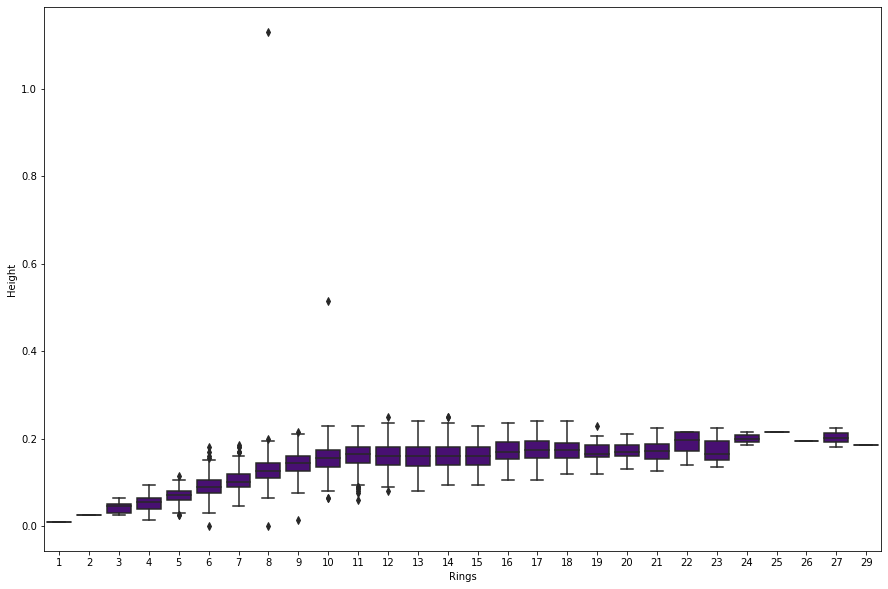

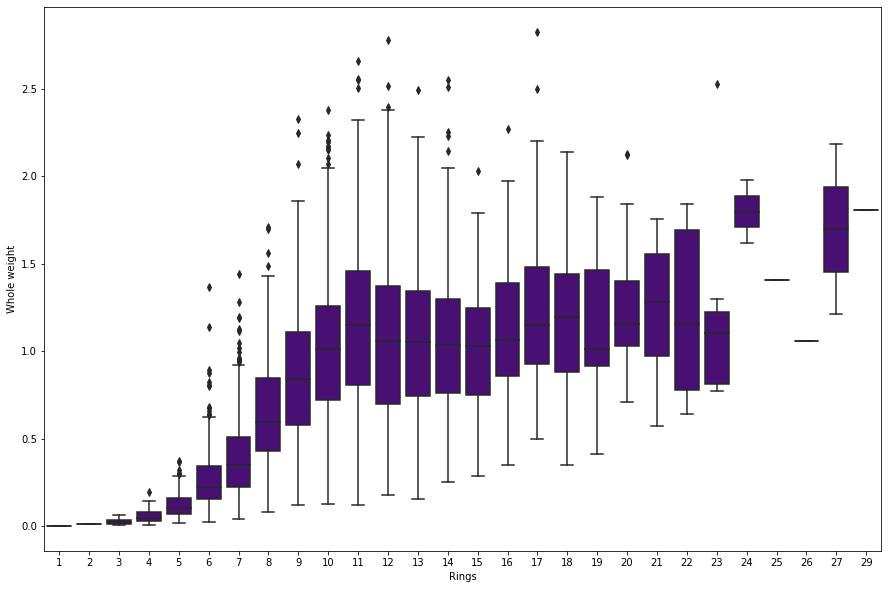

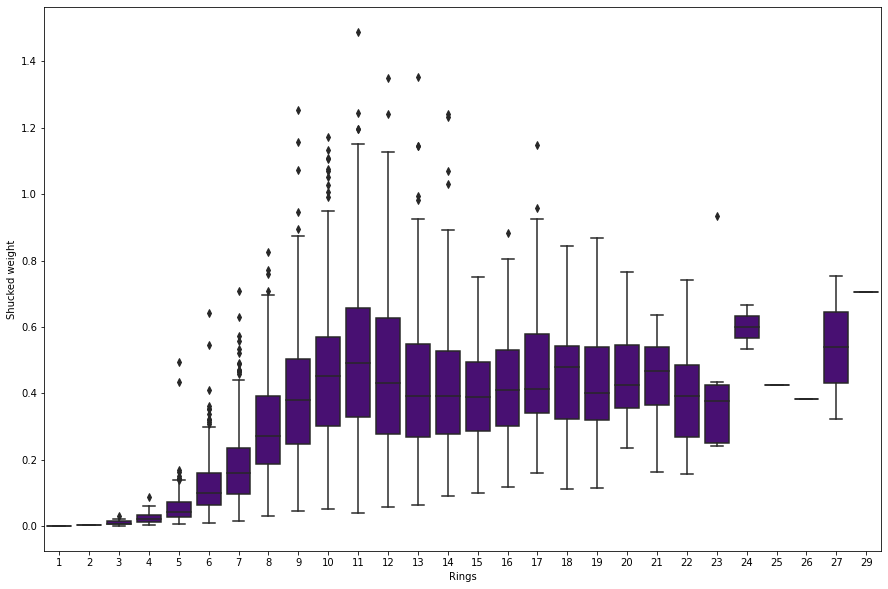

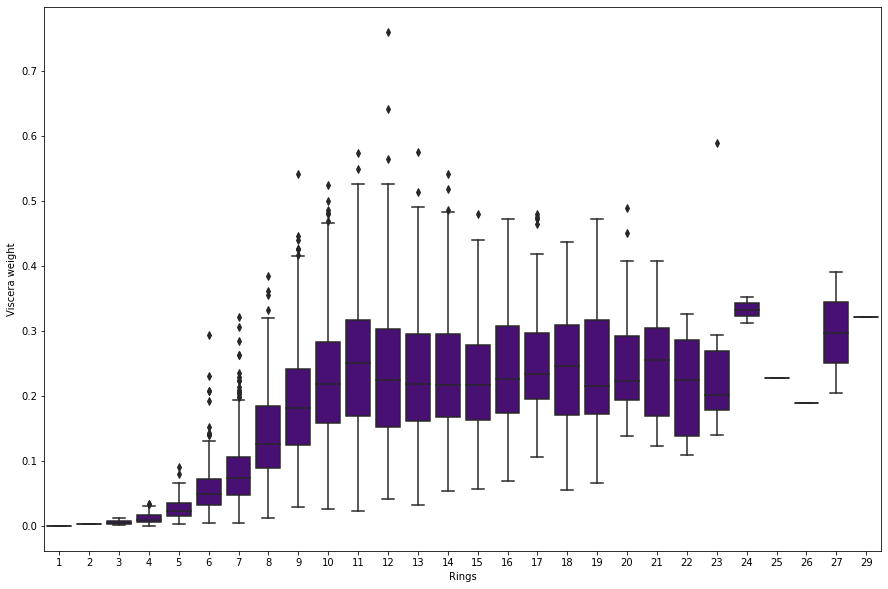

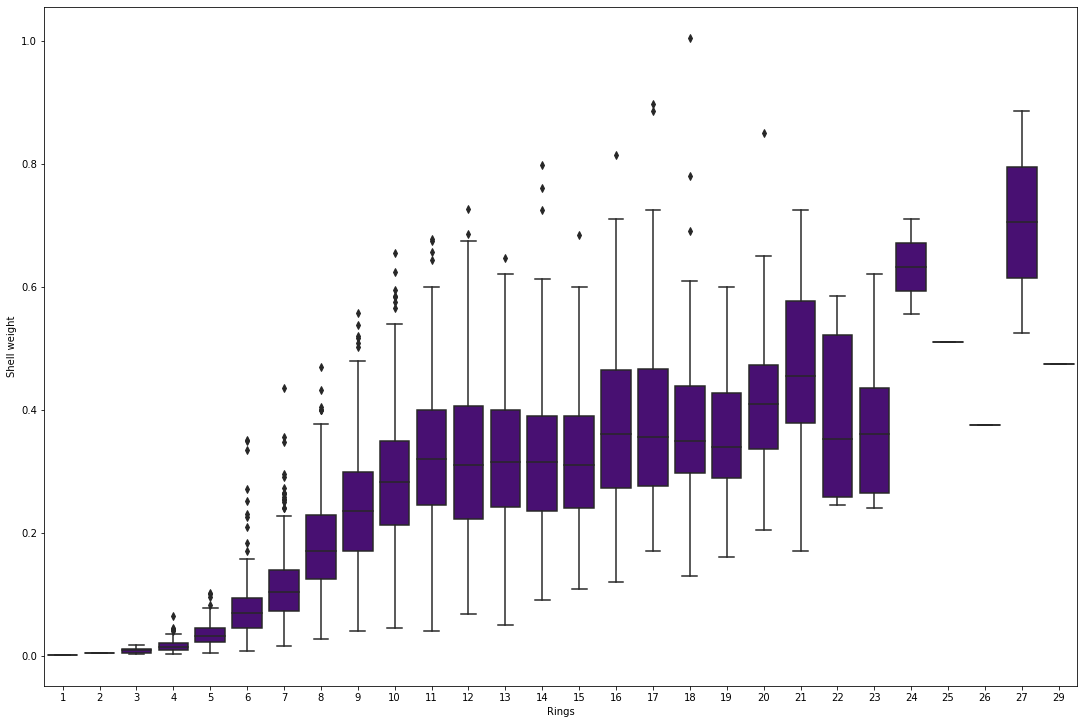

In [40]:
#Box plot
index = 0
for col in features.items():
    plt.figure(figsize=(15,10))
    sns.boxplot(x=labels, y=col[index], data=data_1, color="Indigo")
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

there is an increase in the trend as the value goes upward but at last the trend goes down. With the use of box plot we can the outliers in the data 

C:\Users\anshul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anshul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\anshul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

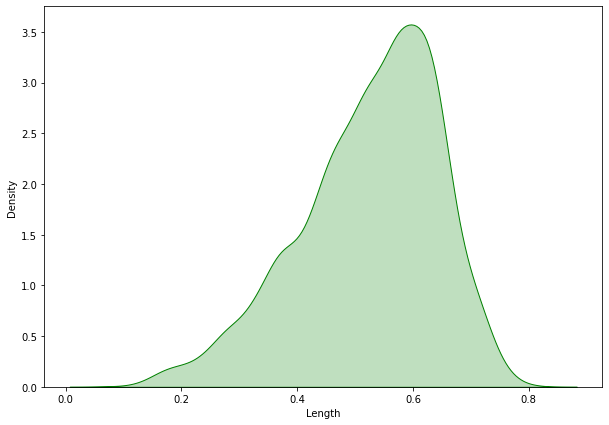

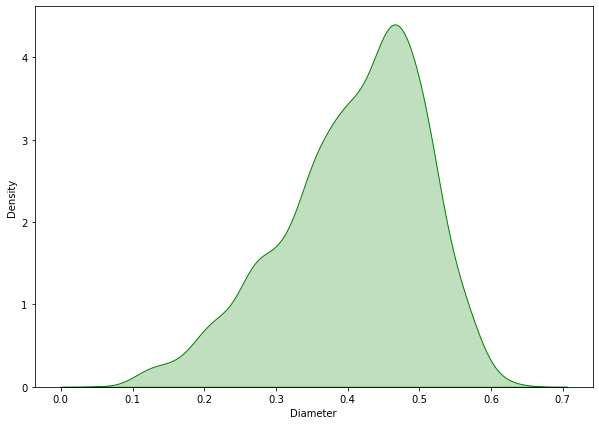

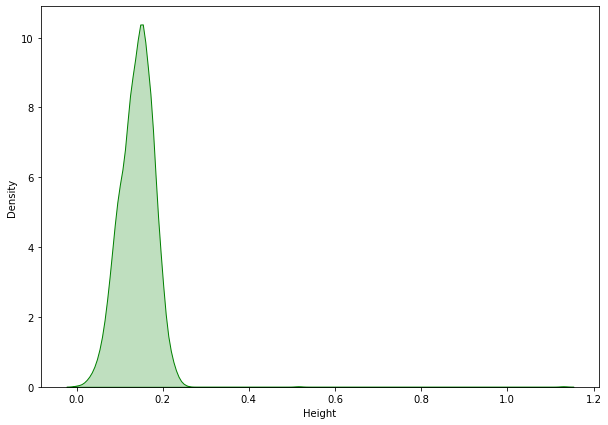

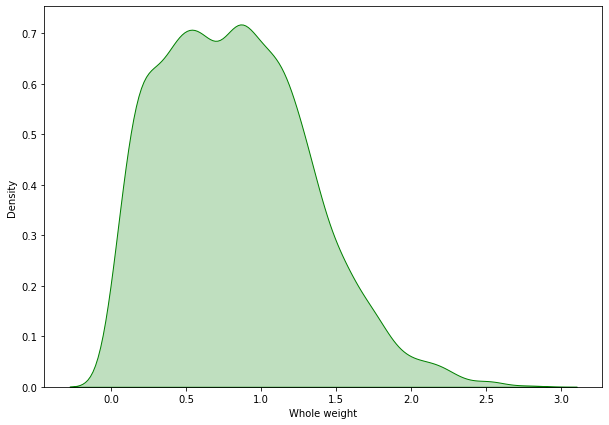

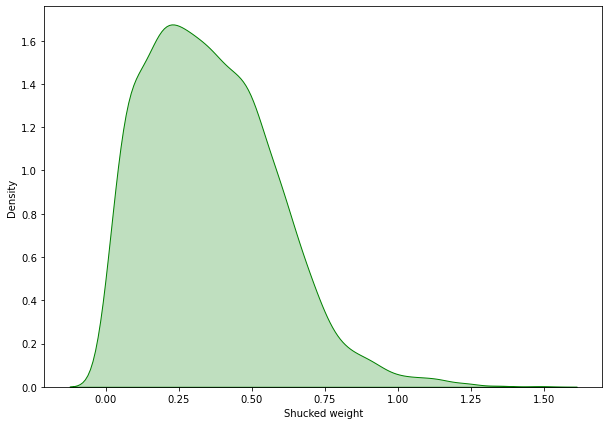

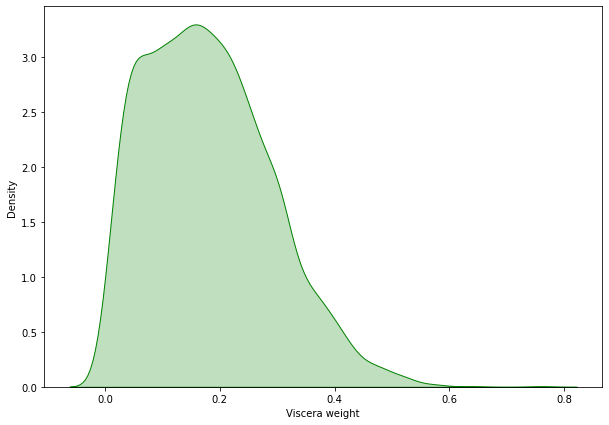

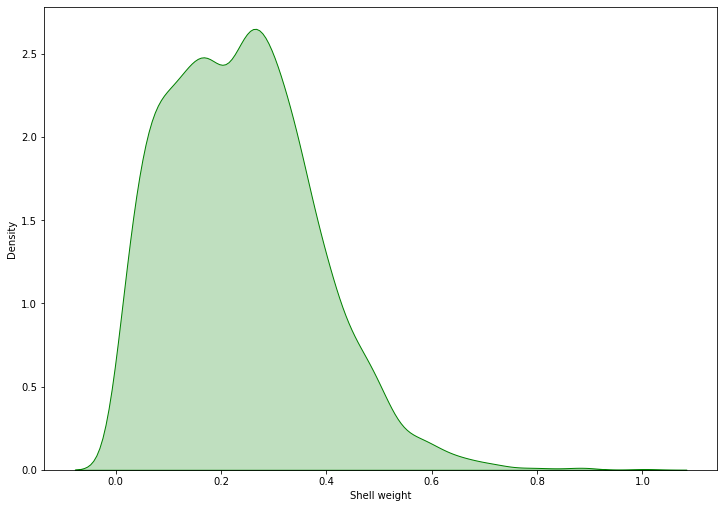

In [41]:
#Distribution Plot
for col, value in features.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="g", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

In the above distribution plots we see that there are skewness due to the outliers which we saw in the boxplot but still many of they are able to retain or rather showcase a bell shape curve indicating a normal distribution. So we can assume that not all outliers are to be removed and some might actually we the genuine data therefore the outliers will need to be treated accordingly.

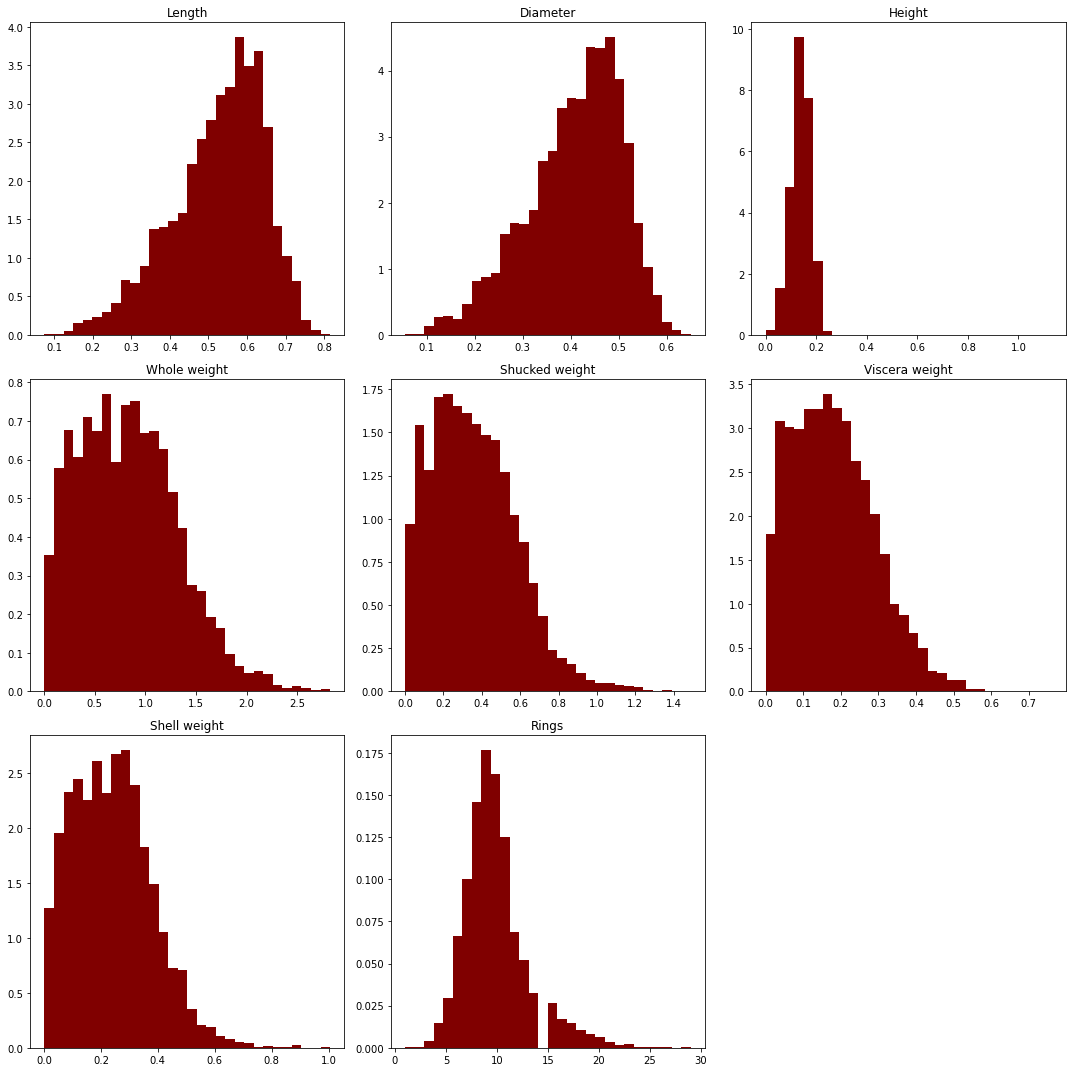

In [42]:
#Histogram
plt.rcParams['figure.figsize'] = (15,15)
data_1.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

As we can see the skewness in the data firstly in the visualization but it is confirmed while plotting and seeing in the histogram

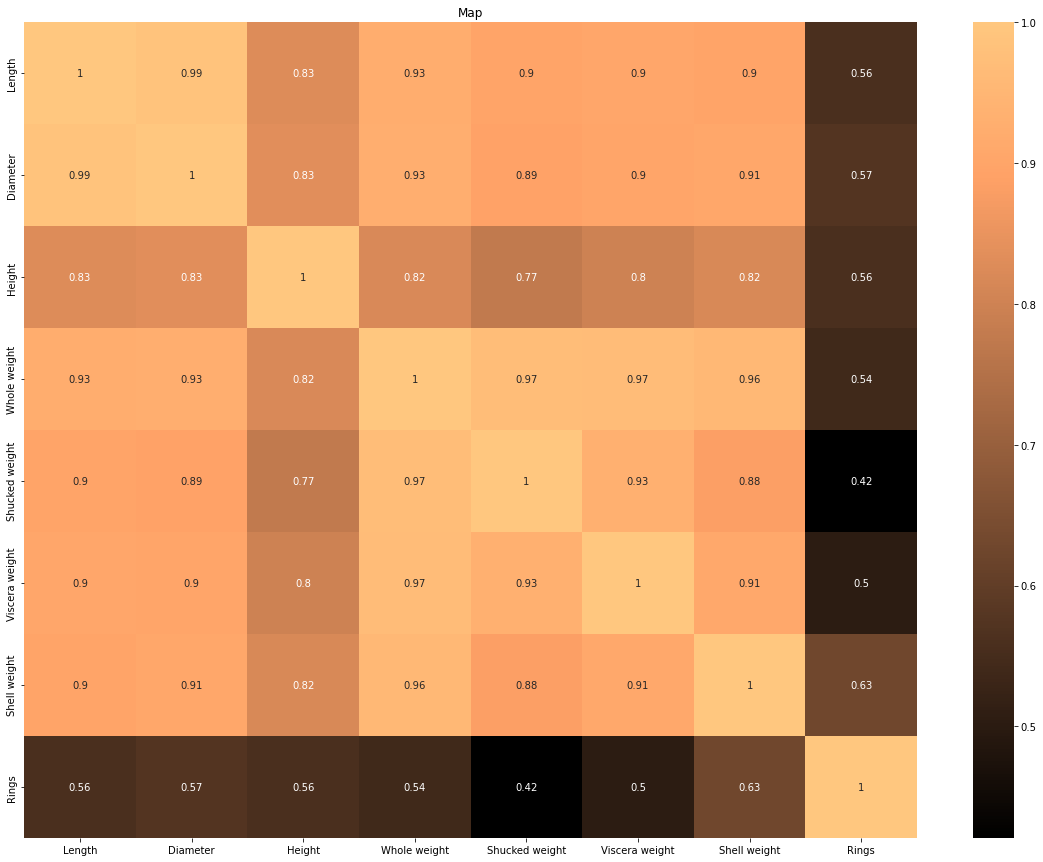

In [43]:
#Heat Map for correlation
# Now we will see the coorelations between the data and the quality 
corr_matrix  =data_1.corr()
#size of the canvas 
plt.rcParams['figure.figsize'] = (20, 15)
#plor the correlation matrix
sns.heatmap(corr_matrix, cmap = 'copper', annot = True)
plt.title('Map')
plt.show()

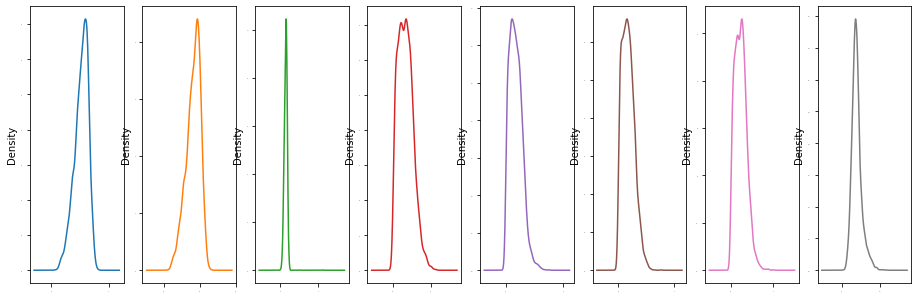

In [12]:
data_1.plot(kind = 'density',subplots = True, layout = (10,20), sharex = False, legend =False ,fontsize =1,figsize=(40,60))
plt.show()

Enconding

In [29]:
data_df = pd.get_dummies(data_1)
data_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


Used Encoding to change the data of the sex in numerical values by get dummines method

# Outliers Removal

In [32]:
data_1.shape

(4177, 9)

In [34]:
# Z score method

z=np.abs(zscore(data_df))
threshold=3
np.where(z>3)

data_df=data_df[(z<3).all(axis=1)]
data_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


I have removed the outliers from the dataset using Z score method

In [36]:
#percentage loss
data_loss = (4177-3967)/4177*100
data_loss

5.027531721331099

# Spiliting the dataset into two variables to train and test

In [37]:
X = data_df.drop('Rings', axis=1)
Y = data_df['Rings']

# VIf (Varience Influence Factor)

In [38]:
vif_data = pd.DataFrame()
vif_data["Features"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

         Features   VIF Value
0          Length   38.697172
1        Diameter   40.193105
2          Height    6.677992
3    Whole weight  106.636824
4  Shucked weight   28.381317
5  Viscera weight   17.237724
6    Shell weight   23.180935
7           Sex_F   27.883967
8           Sex_I   26.400001
9           Sex_M   31.438415


n theory if a VIF is above 10 it indicates high correlation and is cause for concern. Right now we have almost all the feature columns with a high number of VIF value. Feature selection process can be used to omit out the high VIF valued columns but in our dataset we already have very low number of feature columns so will need to try and retain them while making efforts to check if there are other ways to resolve the multi collinearity problem.

Note: In case I drop the high VIF valued columns like Length, Diameter, Whole weight, Shucked weight and Shell weight then I am able to get very high R2 and CV score (close to 100 percent). However it does not make any sense to me that I use only three features Sex, Height and Viscera weight to predict the label Rings (Age) in our dataset.

# Scaling the data using Standard Scaler

In [39]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.567186,-0.416140,-1.171606,-0.627617,-0.599857,-0.720096,-0.624679,-0.668002,-0.703367,1.331963
1,-1.482187,-1.469333,-1.309159,-1.270643,-1.214325,-1.236905,-1.262054,-0.668002,-0.703367,1.331963
2,0.086385,0.163116,-0.071186,-0.264312,-0.442553,-0.321416,-0.146648,1.497001,-0.703367,-0.750772
3,-0.697901,-0.416140,-0.346291,-0.623159,-0.644098,-0.592125,-0.584843,-0.668002,-0.703367,1.331963
4,-1.656472,-1.574652,-1.584264,-1.316335,-1.263482,-1.325501,-1.381561,-0.668002,1.421733,-0.750772
...,...,...,...,...,...,...,...,...,...,...
3962,0.391385,0.479074,0.754129,0.203749,0.115384,0.638372,0.164072,1.497001,-0.703367,-0.750772
3963,0.609242,0.373755,-0.071186,0.379829,0.454570,0.397195,0.255695,-0.668002,-0.703367,1.331963
3964,0.696385,0.742372,1.854549,0.847890,0.879781,1.115805,0.634136,-0.668002,-0.703367,1.331963
3965,0.914242,0.847691,0.341471,0.666238,0.906818,0.854939,0.538530,1.497001,-0.703367,-0.750772


# Training and test data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)
#I have taken 30 percent as the test data and remaining 70 percent as the train data

# Machine Learning Models

In [42]:
def model1(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [45]:
#Linear Regression Model
Model=LinearRegression()
model1(Model,X,Y)

RMSE Score is: 1.9127279635722771
R2 Score is: 47.43423721310619
Cross Validation Score: 44.361568957161914
R2 Score - Cross Validation Score is 3.072668255944272


In [47]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
model1(model, X, Y)

RMSE Score is: 1.966667673333629
R2 Score is: 44.427681646491315
Cross Validation Score: 44.513124771352715
R2 Score - Cross Validation Score is -0.08544312486139916


In [48]:
#Decision tree regressor

model=DecisionTreeRegressor()
model1(model,X,Y)

RMSE Score is: 2.632388845278294
R2 Score is: 0.4373058241806449
Cross Validation Score: -2.782825956868016
R2 Score - Cross Validation Score is 3.2201317810486607


In [49]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
model1(model, X, Y)

RMSE Score is: 2.167708094317101
R2 Score is: 32.485329091084246
Cross Validation Score: 26.51557515168378
R2 Score - Cross Validation Score is 5.969753939400466


In [50]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
model1(model, X, Y)

RMSE Score is: 2.163626819188705
R2 Score is: 32.739317674136025
Cross Validation Score: 26.131896189970416
R2 Score - Cross Validation Score is 6.607421484165609


In [51]:
# SGD Regressor

model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
model1(model, X, Y)

RMSE Score is: 1.9982503492887786
R2 Score is: 42.628480607111804
Cross Validation Score: 36.18514359483609
R2 Score - Cross Validation Score is 6.4433370122757125


In [52]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
model1(model, X, Y)

RMSE Score is: 2.897565589451114
R2 Score is: -20.63216089208606
Cross Validation Score: -48.33119134660851
R2 Score - Cross Validation Score is 27.699030454522454


In [53]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
model1(model, X, Y)

RMSE Score is: 2.119146484364519
R2 Score is: 35.476411538396405
Cross Validation Score: 20.892178986774866
R2 Score - Cross Validation Score is 14.58423255162154


# Hyperparameter Tuning

In [54]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [55]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [56]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 51.43772313470505


# Saving the model

In [57]:
filename = "FinalModel_4.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_4.pkl']